In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 1: Data Preprocessing
# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/power_needs.csv')

In [4]:
print(df.head())

   entry_id  Water Needs(Litres)  Voltage (V)(volts)  Motor Efficiency(%)  \
0       1.0                 93.6                 220                   85   
1       2.0                 93.6                 220                   85   
2       3.0                 93.6                 220                   85   
3       4.0                 93.6                 220                   85   
4       5.0                 93.6                 220                   85   

   Motor Capacity (P)(hp)  Maximum Flow Rate of the Motor(Liters per hour)  \
0                     0.5                                             1800   
1                     0.5                                             1800   
2                     0.5                                             1800   
3                     0.5                                             1800   
4                     0.5                                             1800   

   Power needs(KW)  
0            0.019  
1            0.019  
2    

In [5]:
# Getting last 3 rows from df
df_last_3 = df.tail(3)

# Printing df_last_3
print(df_last_3)

       entry_id  Water Needs(Litres)  Voltage (V)(volts)  Motor Efficiency(%)  \
41549   41555.0               141.05                 220                   85   
41550   41546.0               141.05                 220                   85   
41551   41545.0               141.05                 220                   85   

       Motor Capacity (P)(hp)  \
41549                     0.5   
41550                     0.5   
41551                     0.5   

       Maximum Flow Rate of the Motor(Liters per hour)  Power needs(KW)  
41549                                             1800           0.0296  
41550                                             1800           0.0296  
41551                                             1800           0.0296  


In [6]:
# Handle missing values (if any)
# For simplicity, we'll fill missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)


In [7]:
print(df.head())

   entry_id  Water Needs(Litres)  Voltage (V)(volts)  Motor Efficiency(%)  \
0       1.0                 93.6                 220                   85   
1       2.0                 93.6                 220                   85   
2       3.0                 93.6                 220                   85   
3       4.0                 93.6                 220                   85   
4       5.0                 93.6                 220                   85   

   Motor Capacity (P)(hp)  Maximum Flow Rate of the Motor(Liters per hour)  \
0                     0.5                                             1800   
1                     0.5                                             1800   
2                     0.5                                             1800   
3                     0.5                                             1800   
4                     0.5                                             1800   

   Power needs(KW)  
0            0.019  
1            0.019  
2    

In [8]:
print(df.head())


   entry_id  Water Needs(Litres)  Voltage (V)(volts)  Motor Efficiency(%)  \
0       1.0                 93.6                 220                   85   
1       2.0                 93.6                 220                   85   
2       3.0                 93.6                 220                   85   
3       4.0                 93.6                 220                   85   
4       5.0                 93.6                 220                   85   

   Motor Capacity (P)(hp)  Maximum Flow Rate of the Motor(Liters per hour)  \
0                     0.5                                             1800   
1                     0.5                                             1800   
2                     0.5                                             1800   
3                     0.5                                             1800   
4                     0.5                                             1800   

   Power needs(KW)  
0            0.019  
1            0.019  
2    

In [9]:
# Drop columns that are not relevant for prediction (if any)
df = df.drop(['entry_id'], axis=1)

In [10]:
print(df.head())


   Water Needs(Litres)  Voltage (V)(volts)  Motor Efficiency(%)  \
0                 93.6                 220                   85   
1                 93.6                 220                   85   
2                 93.6                 220                   85   
3                 93.6                 220                   85   
4                 93.6                 220                   85   

   Motor Capacity (P)(hp)  Maximum Flow Rate of the Motor(Liters per hour)  \
0                     0.5                                             1800   
1                     0.5                                             1800   
2                     0.5                                             1800   
3                     0.5                                             1800   
4                     0.5                                             1800   

   Power needs(KW)  
0            0.019  
1            0.019  
2            0.019  
3            0.019  
4            0.019  


In [11]:
# Define features and target variables for power needs prediction
X_power = df[['Water Needs(Litres)', 'Voltage (V)(volts)', 'Motor Efficiency(%)', 'Motor Capacity (P)(hp)', 'Maximum Flow Rate of the Motor(Liters per hour)']]
y_power = df['Power needs(KW)']


In [12]:
# Split the data into training and testing sets for both water and power needs
X_train_power, X_test_power, y_train_power, y_test_power = train_test_split(X_power, y_power, test_size=0.2, random_state=42)


In [13]:
# Step 4: Selecting a Model
model = LinearRegression()  # Linear Regression is chosen as an example. You can try different models.


In [14]:
# Step 5: Model Training
model.fit(X_train_power, y_train_power)

LinearRegression()

In [15]:
# Step 6: Model Evaluation
y_pred = model.predict(X_test_power)
mae = mean_absolute_error(y_test_power, y_pred)
mse = mean_squared_error(y_test_power, y_pred)
r2 = r2_score(y_test_power, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 9.83855336057427e-05
Mean Squared Error: 1.676943324997954e-08
R-squared: 0.9992582202103366


In [16]:
train_score = model.score(X_train_power, y_train_power)
val_score = model.score(X_test_power, y_test_power)

print(f"Training R-squared: {train_score}")
print(f"Validation R-squared: {val_score}")


Training R-squared: 0.9992568395181444
Validation R-squared: 0.9992582202103366


In [17]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
scores = cross_val_score(model, X_power, y_power, cv=5)  # 5-fold cross-validation
print(f"Cross-validated R-squared scores: {scores}")


Cross-validated R-squared scores: [ 0.00000000e+00  9.97287579e-01  6.78755130e-01 -1.39474799e+26
 -1.39474799e+26]


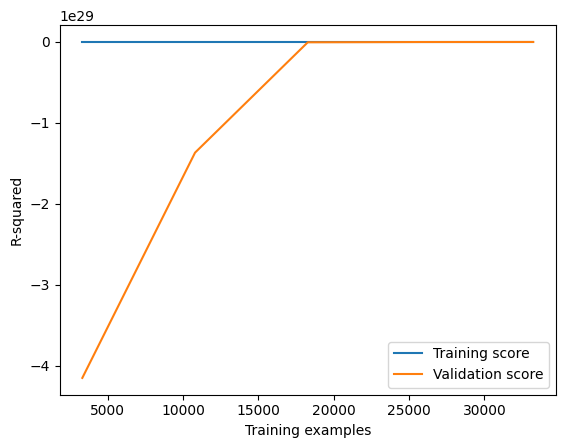

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_power, y_power, cv=5)

# Plot learning curves
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('R-squared')
plt.legend(loc='best')
plt.show()


In [19]:
from sklearn.linear_model import Ridge

# Use Ridge regression with regularization
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_model.fit(X_train_power, y_train_power)
ridge_train_score = ridge_model.score(X_train_power, y_train_power)
ridge_val_score = ridge_model.score(X_test_power, y_test_power)

print(f"Ridge Training R-squared: {ridge_train_score}")
print(f"Ridge Validation R-squared: {ridge_val_score}")


Ridge Training R-squared: 0.99925683951814
Ridge Validation R-squared: 0.9992582202098876


In [20]:
# Assuming you have a separate test set X_test and y_test
test_score = model.score(X_test_power, y_test_power)
print(f"Test R-squared: {test_score}")


Test R-squared: 0.9992582202103366


In [21]:
# Assuming 'X_train' is your DataFrame used for training
features_used = X_train_power.columns.tolist()

print("Features used during training:")
for feature in features_used:
    print(feature)

Features used during training:
Water Needs(Litres)
Voltage (V)(volts)
Motor Efficiency(%)
Motor Capacity (P)(hp)
Maximum Flow Rate of the Motor(Liters per hour)


In [22]:
import pandas as pd

# Assuming X_new is a DataFrame
X_new = pd.DataFrame({
    'Water Needs(Litres)': [90, 105, 95],
    'Voltage (V)(volts)': [220, 220, 220],
    'Motor Efficiency(%)': [85, 85, 85],
    'Motor Capacity (P)(hp)': [0.5, 0.5, 0.5],
    'Maximum Flow Rate of the Motor(Liters per hour)': [1800, 1800, 1800]
    # Add other features as needed
})

In [23]:
# Now, you can use your trained model to make predictions
predictions = model.predict(X_new)

In [24]:
print(predictions)

[0.01821368 0.02153349 0.01932028]


In [25]:
y_train_pred = model.predict(X_train_power)
y_test_pred = model.predict(X_test_power)

# Step 3: Evaluate the model
train_mse = mean_squared_error(y_train_power, y_train_pred)
test_mse = mean_squared_error(y_test_power, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")

Training Mean Squared Error: 1.660911185988965e-08
Testing Mean Squared Error: 1.676943324997954e-08


In [26]:
r_squared = r2_score(y_test_power, y_test_pred)

print(f"R-squared (coefficient of determination): {r_squared}")

R-squared (coefficient of determination): 0.9992582202103366
